Perceptron을 보면,<br> 
Accuracy가 똑같더라도, 판별경계선이 서로 다를 수 있다. <br>
그러면, Accuracy다 똑같아도 판별경계선이 다르면 그 중에 사용하기 더 좋은 놈이 있어(더 일반화하기 좋은 경계선).<br>

![1_122.jpeg](./materials/1_122.jpeg)

# 서포트 벡터 머신

퍼셉트론은 가장 단순하고 빠른 판별 함수 기반 분류 모형이지만 판별 경계선(decision hyperplane)이 유니크하게 존재하지 않는다는 특징이 있다. 서포트 벡터 머신(SVM: support vector machine)은 퍼셉트론 기반의 모형에 가장 안정적인 판별 경계선을 찾기 위한 제한 조건을 추가한 모형이라고 볼 수 있다. 

왼쪽 그림처럼, 데이터 분리가 되있으면 아래 초록 선 중에 아무거로나 해도 사실 accuracy는 다 똑같이 100%<br>
그러나, 가장 좋은 것은 기존 데이터와 경계선이 좀 널찍이 있었으면 좋겠지.<br>
이 널찍하게 떨어진 이 사이를 마진이라고 부른다. <br>

그리고, 선이랑 가장 가까이 있는 데이터와의 거리를 이용해서 마진을 정의. <br>
이때 가장 가까이 붙어있는 이 데이터를 가지고 `Support Vector`라고 부르는 것. <br>
가운데 선이랑 거리 똑같은게 2개면 둘다 `Support Vector`가 될 수 있다. 보통은 그런 경우 많이 없겠지. 

![1_122.jpeg](./materials/1_123.png)

그림 45.2 : 서포트벡터머신

## 서포트와 마진

다음과 같이 $N$개의 학습용 데이터가 있다고 하자.

$$ (x_1, y_1), (x_2, y_2), \ldots, (x_i, y_i), \ldots, (x_N, y_N) $$

판별함수모형에서 $y$는 $+1$, $-1$ 두 개의 값을 가진다

$$ y = \begin{cases} +1 \\ -1 \end{cases} $$

$x$ 데이터 중에서 $y$값이 +1인 데이터를 $x_+$, $y$값이 -1인 데이터를 $x_-$라고 하자.

판별함수 모형에서 직선인(직선을 사용하기로 우리가 결정한 것) 판별 함수 $f(x)$는 다음과 같은 수식으로 나타낼 수 있다.

$$ f(x) = w^Tx-w_0 $$ 

판별함수의 정의에 따라 $y$ 값이 $+1$인 그 데이터 $x_+$에 대한 판별함수 값은 양수가 된다.

$$ f(x_+) = w^Tx_+ - w_0 > 0 $$

반대로 $y$ 값이 $-1$인 그 데이터 $x_-$에 대한 판별함수 값은 음수가 된다.

$$ f(x_-) = w^Tx_- - w_0 < 0 $$

$y$ 값이 $+1$인 데이터 중에서 **판별 함수의 값이 작은 큰 데이터를 $x^+$(부호가 위에 있음)라고 하고  $y$ 값이 $-1$인 데이터 중에서 판별함수의 값이 가장 큰 데이터를 $x^-$라고 하자.** 이 데이터들은 각각의 클래스에 속한 데이터 중에서 가장 경계선에 가까이 붙어있는 최전방(most front)의 데이터들이다. 이러한 데이터를 **서포트(support)** 혹은 **서포트 벡터(support vector)**라고 한다. 물론 이 서포트에 대해서도 부호 조건은 만족되어야 한다.

$$ f(x^+) = w^Tx^+ - w_0 > 0 $$

$$ f(x^-) = w^Tx^- - w_0 < 0 $$


서포트에 대한 판별 함수의 값 $f(x^+)$, $f(x^-)$ 값은 부호 조건만 지키면 어떤 값이 되어도 괜찮다. 따라서 다음과 같은 조건을 만족하도록 판별 함수를 구한다.

$$ f(x^+) = w^T x^{+} - w_0 = +1 $$

$$ f(x^-) = w^T x^{-} - w_0 = -1 $$

![1_125.png](./materials/1_126.jpeg)
![1_125.png](./materials/1_125.png)

그림 18.6.3 : 서포트벡터의 판별함수 값

$x_+, x_-$는 집합이지. 얘네는 모두, SVM보다 바깥쪽에 있음. 

판별 경계선 $w^T x - w_0=0$ 과 점 $x^{+}$, $x^{-}$ 사이의 거리는 다음과 같이 계산할 수 있다. 선형대수에서 나온 선과 점사이 거리를 구하는 공식. 분자에 절댓값 있다(P.162). 

$$ \dfrac{w^T x^{+} - w_0}{\| w \|} = \dfrac{1}{\| w \|} $$

$$ -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{1}{\| w \|}  $$

이 거리의 합을 마진(margin, 서포트에서 선 까지의 길이)이라고 하며 마진값이 클 수록 더 경계선이 안정적이라고 볼 수 있다. 그런데 위에서 정한 스케일링에 의해 마진은 다음과 같이 정리된다.

$$ \dfrac{w^T x^{+} - w_0}{\| w \|}  -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{2}{\| w \|}$$

마진 값이 최대가 되는 경우는 $\| w \|$ 즉, $\| w \|^2$가 최소가 되는 경우와 같다(제곱근 들어가봐야 계산 복잡하니깐 제곱으로). 즉 다음과 같은 목적함수를 최소화하면 된다.

$$ L = \dfrac{1}{2} ||w||^2 = \dfrac{1}{2} w^T w $$

목표가 정해졌다. 여러개 경계선을 찾은 다음에 윗줄 **목적함수**가  가장 작아지는 함수를 찾으면 된다. <br>
아예 분류가 이상한 애들중에 찾는건 아니고, 분류 제대로 하는 애 중에 찾는 것. <br>

그럼, 아래 식 만족하지

또한 모든 표본 데이터에 대해 분류는 제대로 되어야 하므로 모든 데이터 $x_i, y_i \; ( i = 1, \ldots, N)$에 대해 다음 조건을 만족해야 한다.
위에서 스케일링을 사용하여 모든 데이터에 대해 $f(x_i) = w^Tx_i - w_o$ 가 1보다 크거나 -1보다 작게 만들었다는 점을 이용한다. <br>
$y_i$가 +1인 애는 w들어있는 term이 1보다 크다. 곱하면 1보다 커지고, $y_i$가 -1인 애는 w들어있는 term이 -1보다 작으니깐 곱해서 1보다 크다. 

$$ y_i \cdot f(x_i) = y_i \cdot( w^Tx_i - w_o) \geq 1 \;\;\; ( i = 1, \ldots, N )$$

$$  y_i \cdot ( w^Tx_i - w_o) - 1 \geq 0 \;\;\; ( i = 1, \ldots, N )$$

이 부등식 만족하는 애 중에서, 목적함수 최소로 하는애 찾겠다는 것. <br>
각 데이터에 대해서 N개의 부등식이 있지. <br>
N개의 부등식 조건을 만족하는 애 중에서, 목적함수 최소화 하는애 찾으면 된다. <br>
그게 바로 부등식 제한조건이 있는 최적화문제. KKT조건. <br>

라그랑주 승수법을 사용하면 최소화 목적함수를 다음과 같이 고치면 된다.

$$ L = \dfrac{1}{2} w^T w - \sum_{i=1}^N a_i \{ y_i \cdot ( w^Tx_i - w_o) - 1 \} $$

여기에서 $a_i$은 각각의 부등식에 대한 라그랑주 승수이다.

이 최적화 문제를 풀어 $w$, $w_0$, $a$를 구하면 판별함수를 얻을 수 있다. 

![1_127.jpeg](./materials/1_127.jpeg)

KKT(Karush–Kuhn–Tucker) 조건에 따르면 부등식 제한 조건이 있는 경우에는 등식 제한조건을 가지는 라그랑주 승수 방법과 비슷하지만 $i$번째 부등식이 있으나 없으나 답이 같은 경우에는 라그랑지 승수의 값이 $a_i=0$이 된다. 이 경우는 판별함수의 값 $w^Tx_i - w_o$이 $-1$보다 작거나 $1$보다 큰 경우이다.

$$ y_i(w^Tx_i - w_o) - 1  > 0 $$

학습 데이터 중에서 최전방 데이터인 서포트 벡터가 아닌 모든 데이터들에 대해서는 이 조건이 만족되므로 서포트 벡터가 아닌 데이터는 라그랑지 승수가 0이라는 것을 알 수 있다.
<br> 왜? 서포트벡터가 가장 값이 작은애야. 제일 값이 작은 애가 이미 0이야. 그러면, 그 보다 뒤에 있는 애들은 $ y_i(w^Tx_i - w_o) - 1  > 0 $ 다 이게 만족이 돼. 즉, 서포트벡터의 부등식을 만족시키면, 그 뒤는 싹다 자동으로 만족되서 뒤에 부등식들은 있으나 마나 한 상황인 것. 즉, 서포트벡터 이외의 나머지의 라그랑주승수는 싹다 0. 그래서 아래 결론이 나오는 것. 

$$ a_i = 0 \;\; \text{if} \;\; x_i \notin \{ x^{+}, x^{-} \} $$

결과적으로 그렇다는거지, 어쨋든 답은 구해야지. <br>
KKT써서 위 식 풀어야돼. 근데, KKT어떻게 구한다고? 라그랑주승수가 0인경우 아닌경우 싹다 나눠서 미분해서 푸는 것<br>
대충 feature갯수의 2배만큼 최적화 문제를 다 풀어봐야 한다. <br>
이렇게 푸는게 너무 말이 안되니깐, `Dual Form`이라는 것을 만들어 낸 것. 

지금 라그랑주 찾는 식에서, $x_i$, $y_i$는 알고 있고, 
$$ L = \dfrac{1}{2} w^T w - \sum_{i=1}^N a_i \{ y_i \cdot ( w^Tx_i - w_o) - 1 \} $$
나머지는 다 모른다. w값과 a값을 찾아야 된다. <br>

그래서 문제를 뒤튼다. <br>
1. 일단 첫번째 조건, w로 미분해서 0이 나오는 문제 푼다. $w$와 $w_0$로 미분해서 0
2. 여기서 나온 식으로 다시 목적함수에 대입하니깐 a만 남는다. 
3. a로 되있는 식을 최적화 하면 된다. 

## 듀얼 형식

최적화 조건은 목적함수 $L$을 $w$, $w_0$로 미분한 값이 0이 되어야 하는 것이다.
$$ 
\dfrac{\partial L}{\partial w} = 0
$$

$$ 
\dfrac{\partial L}{\partial w_0} = 0
$$


이 식을 풀어서 정리하면 다음과 같아진다.

$$ 
\begin{eqnarray}
\dfrac{\partial L}{\partial w} 
&=& \dfrac{\partial}{\partial w} \left( \dfrac{1}{2} w^T w \right) - 
    \dfrac{\partial}{\partial w} \sum_{i=1}^N \left( a_i y_i w^Tx_i - a_i y_i w_o - a_i \right) \\
&=& w - \sum_{i=1}^N  a_i y_i x_i \\
&=& 0
\end{eqnarray}
$$

$$ 
\begin{eqnarray}
\dfrac{\partial L}{\partial w_0} 
&=& \dfrac{\partial}{\partial w_0} \left( \dfrac{1}{2} w^T w \right) - 
    \dfrac{\partial}{\partial w_0} \sum_{i=1}^N \left( a_i y_i w^Tx_i - a_i y_i w_o - a_i \right) \\
&=& \sum_{i=1}^N  a_i y_i \\
&=& 0
\end{eqnarray}
$$

즉, 

$$ 
w = \sum_{i=1}^N a_i y_i x_i
$$

$$ 
0 = \sum_{i=1}^N a_i y_i 
$$

이 두 수식을 원래의 목적함수에 대입하여 $w$, $w_0$을 없애면 다음과 같다.

$$
\begin{eqnarray}
L
&=& \dfrac{1}{2} w^T w - \sum_{i=1}^N a_i \{ y_i \cdot ( w^Tx_i - w_o) - 1 \}  \\
&=& \dfrac{1}{2} \left( \sum_{i=1}^N a_i y_i x_i \right)^T \left( \sum_{j=1}^N a_j y_j x_j \right) - 
    \sum_{i=1}^N a_i \left\{ y_i \cdot \left( \left( \sum_{j=1}^N a_j y_j x_j \right)^Tx_i - w_o \right) - 1 \right\}  \\
&=& \dfrac{1}{2} \sum_{i=1}^N \sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j - 
    \sum_{i=1}^N \sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j +
    w_0 \sum_{i=1}^N a_i y_i + \sum_{i=1}^N a_i   \\
&=& \sum_{i=1}^N a_i - \dfrac{1}{2}\sum_{i=1}^N\sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j
\end{eqnarray}
$$


즉,

$$
L = \sum_{i=1}^N a_i - \dfrac{1}{2}\sum_{i=1}^N\sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j
$$

이 때 $a$는 다음 조건을 만족한다.

$$
\sum_{i=1}^N a_i y_i = 0
$$

$$
a_i \geq 0 \;\;\;  ( i = 1, \ldots, N )
$$

지금 위 문제가(`즉` 이후), Quadratic Programming(이차계획법)이라고 부른다(P 370). 형식이 똑같음. 

이 문제는 $w$를 구하는 문제가 아니라 $a$만을 구하는 문제로 바뀌었으므로 듀얼형식(dual form)이라고 한다. 듀얼형식으로 바꾸면 수치적으로 박스(Box)제한 조건이 있는 이차프로그래밍(QP; quadratic programming) 문제가 되므로 원래의 문제보다는 효율적으로 풀 수 있다.

a를 구하는 문제가 QP문제가 되면, 엄청 간단해 지는 것. a가 구해지면 그것으로 w를 구할 수 있다. a는 서포트 제외하면 다 0이 나온다. 

듀얼형식 문제를 풀어 함수 $L$ 를 최소화하는 $a$를 구하면 예측 모형을 다음과 같이 쓸 수 있다.

$$
f(x) = w^T x - w_0 = \sum_{i=1}^N a_i y_i x_i^T x - w_0
$$


$w_0$는

$$ w_0 = w^T x^{+} - 1 $$

또는 

$$ w_0 = w^T x^{-} + 1 $$

또는 

$$ w_0 = \dfrac{1}{2} w^T (x^+ + x^{-}) $$


로 구한다.

대부분은 Support가 하나밖에 없잖아. 그래서 식을 구하면 아래처럼 간단하게 나온다. 원래 식은 $$
f(x) = w^T x - w_0 = \sum_{i=1}^N a_i y_i x_i^T x - w_0
$$
이거 였는데 엄청 간단해 진 것. a가 대부분은 다 0이니깐. 

라그랑주 승수 값이 0 즉, $a_i = 0$ 이면 해당 데이터는 예측 모형, 즉 $w$ 계산에 아무런 기여를 하지 않으므로 위 식을 실제로는 다음과 같다. 판별함수 자체에 라그랑주 할때 쓴, alpha가 껴있네. 

$$
f(x) = a^+ x^T x^+ - a^- x^T x^- - w_0 
$$

여기에서 $x^T x^+$ 는 $x$와 $x^+$사이의 (코사인)유사도, $x^T x^-$ 는 $x$와 $x^-$사이의 (코사인)유사도이므로 결국 두 서포트 벡터와의 유사도를 측정해서 값이 큰 쪽으로 판별하게 된다.

내적은 코사인유사도를 구하는 작업. 누가 닮았냐는 거야. x를 딱 주고, x가 +랑 닮았니 -랑 닮았니 물어본거야. <br>
근데, +-의 각각 대표를 support로 쓴거야. 각각 얼마나 닮았는지를 계산해서 그게 +가 나오면 +에 가까운거고 -가 나오면 -에 가깝게 되는 거야. <br>

결국 이 모든 작업이 대표하는 애랑 유사도 구하는 작업이였던 것. 

#### 핵심정리

![1_128.jpeg](./materials/1_128.jpeg)

## Scikit-Learn의 서포트 벡터 머신

Scikit-Learn의 ``svm`` 서브페키지는 서포트 벡터 머신 모형인 `SVC` (Support Vector Classifier) 클래스를 제공한다. 

SVM은 실제 Regression으로도 쓰인다. 그래서, `SVR` 패키지도 있다. 

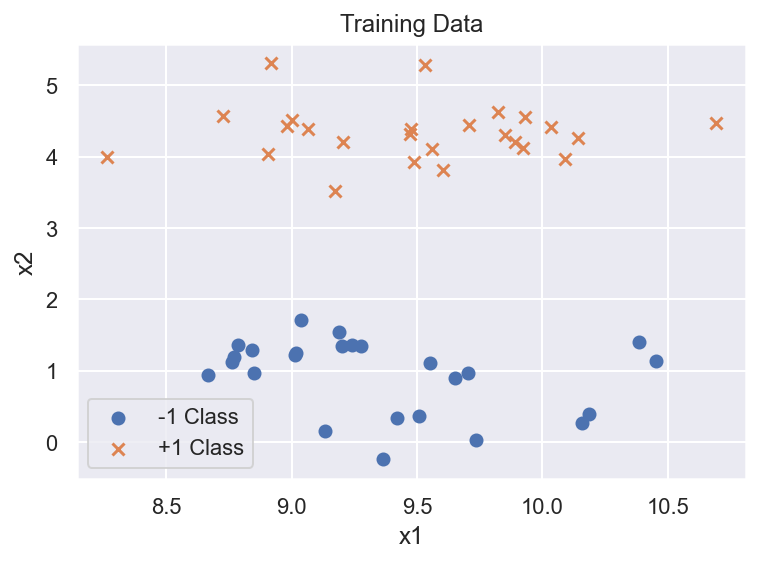

In [18]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 Class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 Class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Training Data")
plt.show()

`SVC` 클래스는 커널(kernel)을 선택하는 인수 `kernel`과 슬랙변수 가중치(slack variable weight)를 선택하는 인수 `C`를 받는데 지금까지 공부한 서포트 벡터 머신을 사용하려면 인수를 다음처럼 넣어준다. 이 인수들에 대해서는 곧 설명한다.

```
SVC(kernel='linear', C=1e10)
```

In [3]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

`SVC`를 사용하여 모형을 구하면 다음과 같은 속성값을 가진다.

* `n_support_`: 각 클래스의 서포트의 개수
* `support_`: 각 클래스의 서포트의 인덱스
* `support_vectors_`: 각 클래스의 서포트의 x 값. $x^{+}$와 $x^{-}$
* `coef_`: $w$ 벡터
* `intercept_`: $-w_0$
* `dual_coef_`: 각 원소가 $a_i \cdot y_i$로 이루어진 벡터

In [4]:
# 42와 1은 인덱스 넘버. 
model.support_

array([42,  1], dtype=int32)

In [5]:
# 보통은 1개가 대부분이지
model.n_support_

array([1, 1], dtype=int32)

In [6]:
# 누가 서포트니?
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [7]:
y[model.support_]

array([-1,  1])

In [19]:
model.coef_, model.intercept_

(array([[0.08171082, 1.10091404]]), array([-3.62995208]))

이게 바로 위에서 라그랑주 할때 썻던 a값. <br>
다만, 그냥 a가 아니라 +인 애는 `+a`, -인 애는 `-a`가 들어가 있다. 

In [20]:
model.dual_coef_

array([[-0.60934379,  0.60934379]])

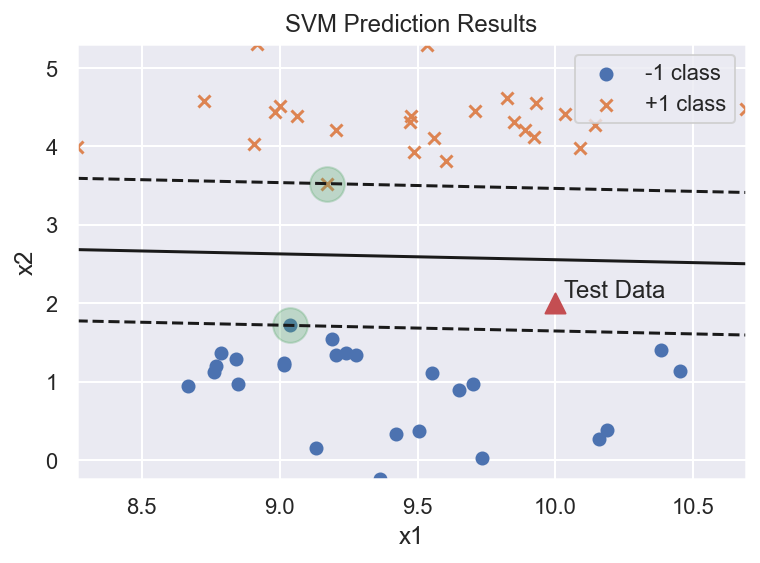

In [21]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "Test Data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM Prediction Results")

plt.show()

중간이 판별선. 녹색이 support vector로 표시. <br>
support벡터를 지나는 점선이 `f(x)=1, f(x)=-1`인 식이 되겠지. <br>
코드 보면, [0, -1, 1]일때 등고선을 그린 것. 

(10, 2)를 넣고, decision function 값. 

In [22]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])

$f(x) = w^T x - w_0 = \sum_{i=1}^N a_i y_i x_i^T x - w_0$
<br><br>

그대로 계산 해보면, `coef_`에 `x_new` 내적하고, 상수항 뺀거지(intercept자체가 상수항에 - 붙어있음). 

In [23]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

아니면 아래처럼 해도 돼. 
$$
f(x) = a^+ x^T x^+ - a^- x^T x^- - w_0 
$$

In [24]:
# dual_coef_ = a_i * y_i
model.dual_coef_

array([[-0.60934379,  0.60934379]])

In [25]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
    model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
    model.intercept_

array([-0.61101582])

#### 연습 문제 1

붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 `kernel`과 슬랙변수 가중치 인수 `C`는 각각 `linear`, `1e10`으로 한다.

* 특징 변수를 꽃받침의 길이와 폭만 사용한다.
* 붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.


In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data[:100, :2]
y_iris = iris.target[:100]
y_iris = np.where(y_iris == 0, -1, 1)


from sklearn.svm import SVC
model1 = SVC(kernel="linear", C=1e10).fit(X_iris, y_iris)

from sklearn.metrics import classification_report
print(classification_report(y_iris, model1.predict(X_iris)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [40]:
y_iris

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [41]:
X_iris[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

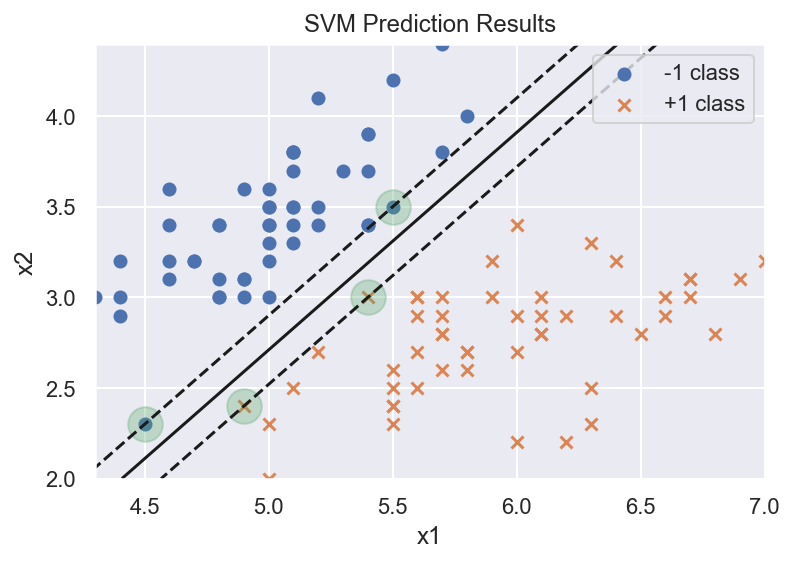

In [45]:
x1min = X_iris[:, 0].min()
x1max = X_iris[:, 0].max()
x2min = X_iris[:, 1].min()
x2max = X_iris[:, 1].max()
xx = np.linspace(x1min, x1max, 10)
yy = np.linspace(x2min, x2max, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model1.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X_iris[y_iris == -1, 0], X_iris[y_iris == -1, 1], marker='o', label="-1 class")
plt.scatter(X_iris[y_iris == +1, 0], X_iris[y_iris == +1, 1], marker='x', label="+1 class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model1.support_vectors_[:, 0], model1.support_vectors_[:, 1], s=300, alpha=0.3)

# x_new = [10, 2]
# plt.scatter(x_new[0], x_new[1], marker='^', s=100)
# plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "Test Data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM Prediction Results")

plt.show()

선 하나로 깨끗하게 나눌 수 있는 분리하는 케이스를 얘기한건데. <br>
도저히 선 하나로 구분이 안되는 경우는?<br>
그때 슬랙변수라는 것을 사용하는거야. 

## 슬랙변수

![1_130.png](./materials/1_130.png)

![1_131.png](./materials/1_131.png)

![1_132.jpeg](./materials/1_132.jpeg)

만약 데이터가 직선인 판별 경계선으로 나누어지지 않는 즉, 선형분리(linear separable)가 불가능한 경우에는 다음과 같이 슬랙변수(slack variable)를 사용하여 개별적인 오차를 허용할 수 있다.

원래 판별 함수의 값은 클래스 $+1$ 영역의 샘플 $x_+$에 대해 

$$ w^Tx_+ - w_0 \geq 1 $$  

클래스 $-1$ 영역의 샘플 $x_-$에 대해 
 
$$ w^Tx_- - w_0 \leq -1 $$

이어야 한다.

양수인 슬랙변수 $\xi \geq 0 $를 사용하면 이 조건을 다음과 같이 완화할 수 있다.


$$ w^Tx_+ - w_0 \geq +1-\xi_i $$

$$ w^Tx_- - w_0 \leq -1+\xi_i $$

즉,

$$ y(w^Tx_- - w_0) \leq -1+\xi_i $$

이 된다.

모든 슬랙변수는 0보다 같거나 크다.

$$ \xi_i \geq 0 \;\;\; (i=1, \ldots, N) $$


위의 부등식 조건을 모두 고려한 최적화 목적함수는 다음과 같아진다.

$$ 
L = \dfrac{1}{2} ||w||^2 - \sum_{i=1}^N a_i (y_i \cdot ( w^Tx_i - w_o) - 1 + \xi_i ) - \sum_{i=1}^N \mu_i \xi_i  + C \sum_{i=1}^N \xi_i    
$$

위 식에서 $C \sum_{i=1}^N \xi_i$ 항은 슬랙변수의 합이 너무 커지지 않도록 제한하는 역할을 한다.

아까 목적함수에서 크싸이항을 추가시킨 것. 부등식 제한조건이 N개가 더 추가됬음. 
$$ \xi_i \geq 0 \;\;\; (i=1, \ldots, N) $$
또 라그랑주 해야돼. <br>
위 식에서 $\mu$가 이 부등식에 대해 라그랑주 멀티플라이 해주는 값. 

$C \sum_{i=1}^N \xi_i$ 마지막 얘는, 슬렉 변수를 넉넉하게 잡을거냐, 아니면 되도록 안만들꺼냐를 조정하는 값. <br>
슬렉 변수가 있으면 이 항이 점점 커지잖아. 원래 목적은 L을 작게 만드는 것. 마진을 크게 만들려고 하다 보니깐, 아래 오른쪽 사진 보면 마진이 커지는 대신 
<br> 슬렉 변수가 파고 들어갔음.  <br> 
슬렉 변수는 없어지는데 마진이 작아짐. 




<br> 
<br> 
C가 큰 값이면, 슬랙변수가 생길 때마다 패널티가 엄청 커지니깐, $\sum_{i=1}^N \xi_i$ 얘를 작게 하려고 노력한다. <br> 
슬랙 변수 되도록이면 안생기게 만든다는 것. <br> 
슬랙 변수 안생기게 하면서, 마진이 작아지는 한이 있더라도, C가 엄청 크면 그렇게라도 만든다는 것. <br> 
C가 막 100억이야, 그러면 뭐 마진이 커지냐 작냐가 중요한게 아니야. 마진이고 뭐고 일단, 최대한 슬랙 변수를 안만들어야돼. <br> 


그래서, C를 크고 작게 만들면, 슬랙변수가 많이 생기고 적게 생기는 현상이 발생하는 것. <br> 


![1_129.png](./materials/1_129.png)

그림 18.6.3 : $C$ 값에 따른 판별 함수의 변화

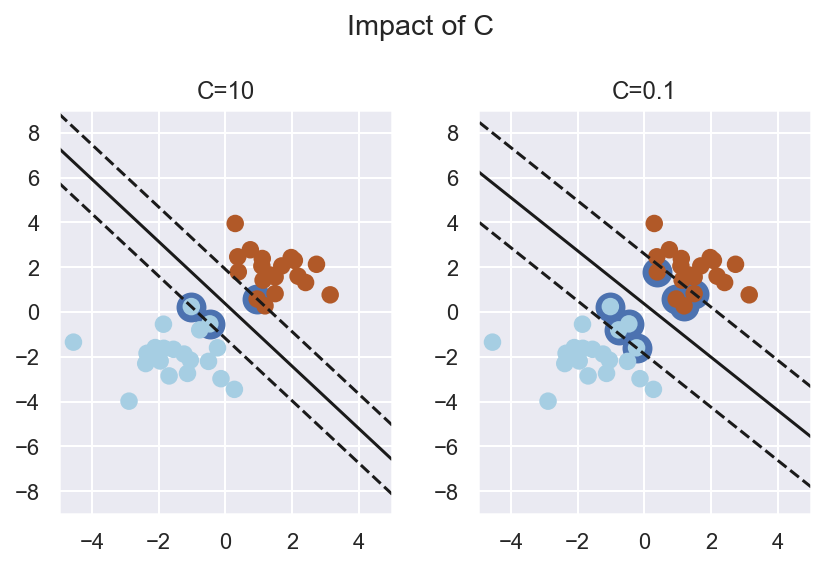

In [46]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

plotnum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)

    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)

    plotnum += 1

plt.suptitle("Impact of C")
plt.tight_layout()
plt.show()

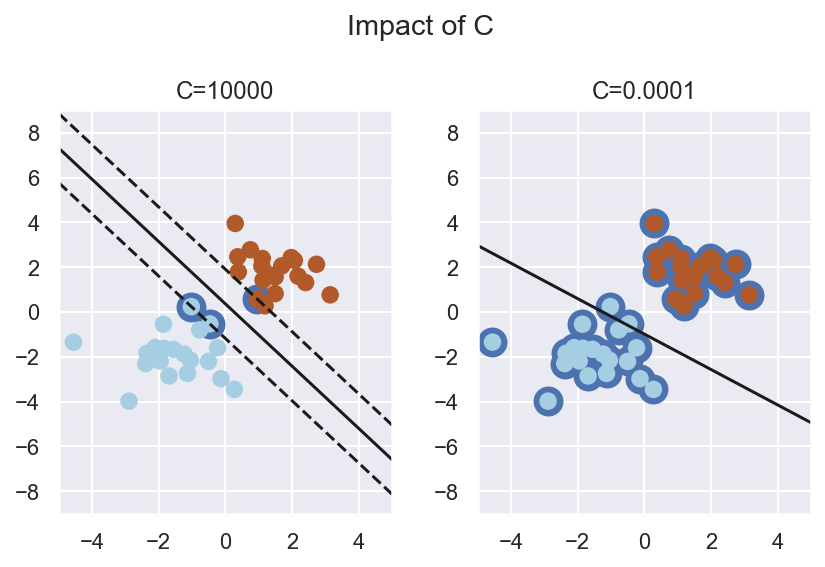

In [47]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

plotnum = 1
for name, penalty in (('C=10000', 10000), ('C=0.0001', 0.0001)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)

    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)

    plotnum += 1

plt.suptitle("Impact of C")
plt.tight_layout()
plt.show()

C를 크게 놓으니깐, 마진이 작아지는 한이 있어도 슬랙변수 되도록이면 안만들려고 함. <br> 
C를 작게 놓으면 슬랙변수 좀 만들어도 상관이 없음. W값만 작아진다면. <br> 
즉, 마진이 커지게 된다. 대신, 얘네들이 싹다 서포트로 잡히게 된다. <br> 

아까 라그랑주 계산할때, Support Vector에 대해서만 0이 아니고, 나머지는 0이 된다고 했음. <br> 
그래서, 아까 x를 딱 넣으면 서포트 벡터하고만 유사도를 재면 된다고 했음. <br> 
그런데 지금 이 상황에서는, 서포트 벡터의 갯수가 늘어나게 된다. <br> 
이전에는 가장 앞에 나와있는애고만 유사도를 재면 됬었는데, 유사도를 재야 하는 대상이 많아짐. <br> 
+애들과의 유사도 다 합해서 더하고, -애들과의 유사도 다 더해서 판별함수 값이 결정되는 것. <br> <br> 


계산량은 늘어난 대신에, 사실 SVM은 맨 앞에 나와있는 서포트벡터 1개씩에만 의존하게 되니깐 데이터 조금만 바뀌어도 경계선이 팍팍 틀어졌었음. <br> 
그런데, 서포트벡터가 몇개씩 되면, 선이 훨씬 더 안정적이 되겠지. 즉, C가 작은 숫자가 되면 계산량은 늘어나지면, 확확 바뀌진 않다. <br> 
**성능 분산이 줄어든다.**<br> 

K-Fold로 하다 보면, 서포트 벡터가 서로 다르게 잡힐텐데, 그때마다 너무 팍팍 틀어지면 결과/퍼포먼스가 너무 달라질 수 있지. <br> 
그런데 C를 줄이면 데이터가 여러개가 서포트 벡터로 잡히니깐, 비교적 더 안정적으로 된다는 뜻. 

#### 연습 문제 2

붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 `kernel`는 각각 `linear`로 한다. 슬랙변수 가중치 인수 `C`를 여러가지 값으로 바꾸어 보면서 서포트가 어떻게 바뀌는지 살펴본다.

* 특징 변수를 꽃잎의 길이와 폭만 사용한다.
* 붓꽃 종을 Virginica와 Versicolour만 대상으로 한다.


In [49]:
from sklearn.datasets import load_iris
iris = load_iris()
X2 = iris.data[50:, 2:]
y2 = iris.target[50:] - 1

from sklearn.svm import SVC
model1 = SVC(kernel="linear", C=1e10).fit(X2, y2)

from sklearn.metrics import classification_report
print(classification_report(y2, model1.predict(X2)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        50
           1       1.00      0.90      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



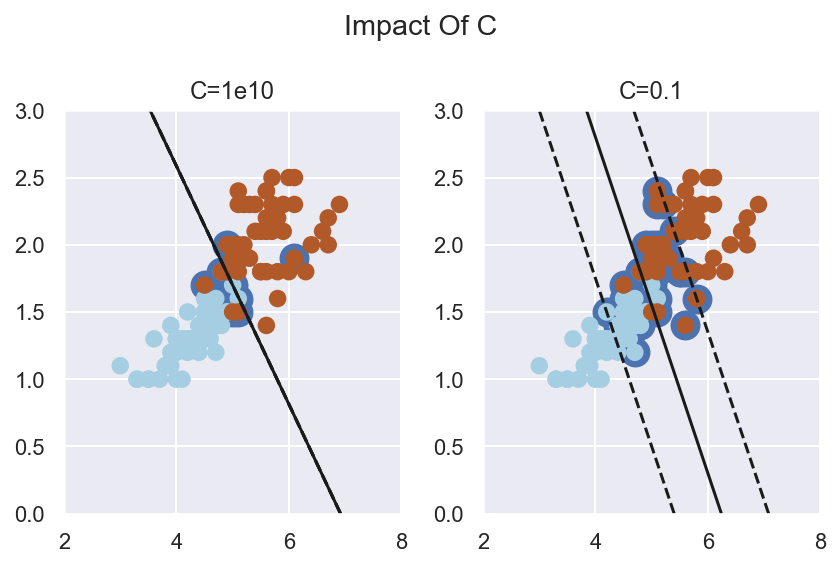

In [50]:
plotnum = 1
for name, penalty in (('C=1e10', 1e10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X2, y2)
    xx = np.linspace(2, 8)

    x_jin = 2
    x_jax = 8
    y_jin = 0
    y_jax = 3
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)

    plotnum += 1

plt.suptitle("Impact Of C")
plt.tight_layout()
plt.show()

#### 연습 문제 3

MNIST Digit Image 분류 문제를 서포트 벡터 머신으로 풀어보자. 

## 얼굴 이미지 인식

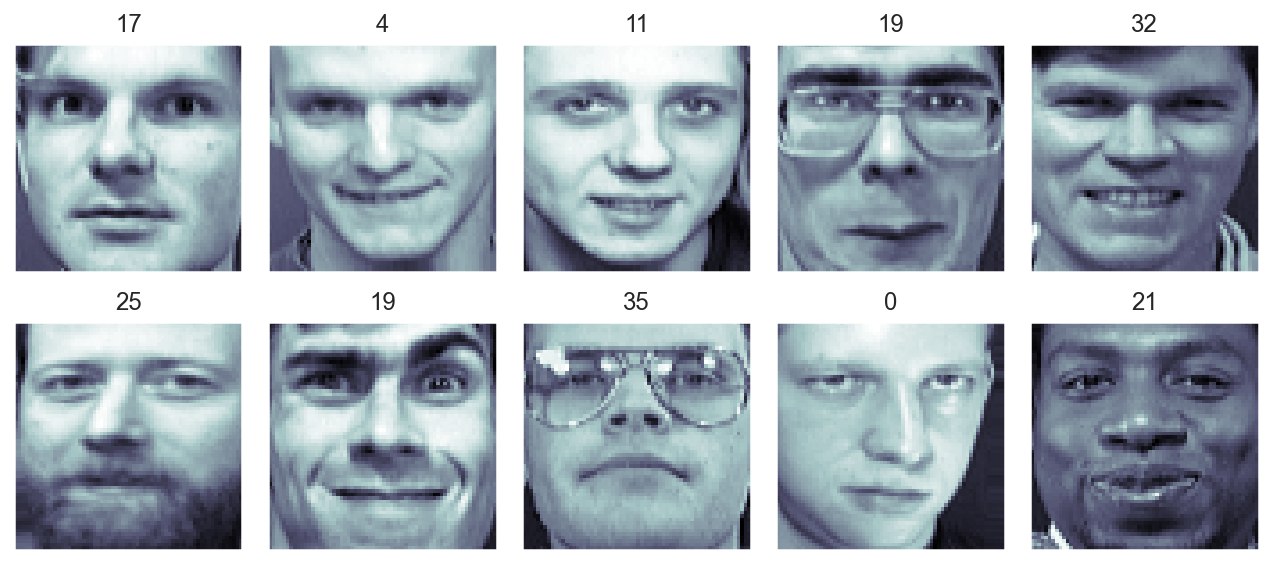

In [51]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

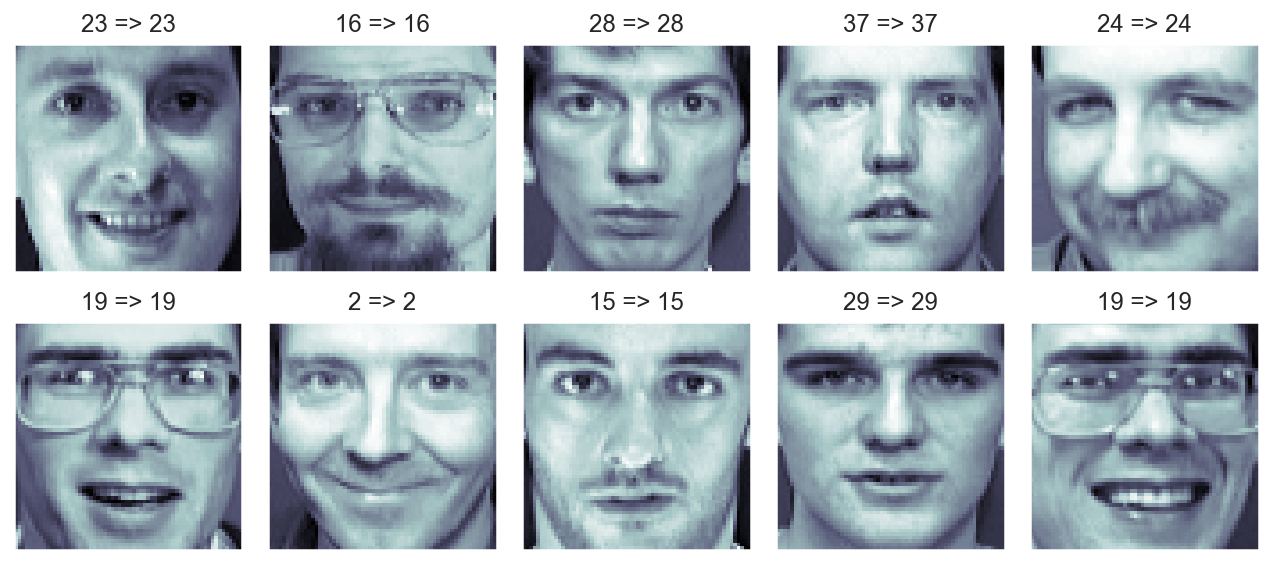

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" %
                  (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [54]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [55]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    

# 커널 서포트 벡터 머신

## XOR 문제

퍼셉트론이나 서포트 벡터 머신과 같은 선형판별함수 분류모형은 다음과 같은 XOR(exclusive OR) 문제를 풀지 못한다는 단점이 있다. 

| | X2=0 | X2=1 |
|-|-|-|
|X1=0| 0 | 1 |
|X1=1| 1 | 0 | 

이러한 경우에는 다음 그림에서 보듯이 선형판별평면(decision hyperplane)으로 영역을 나눌 수 없기 때문이다.

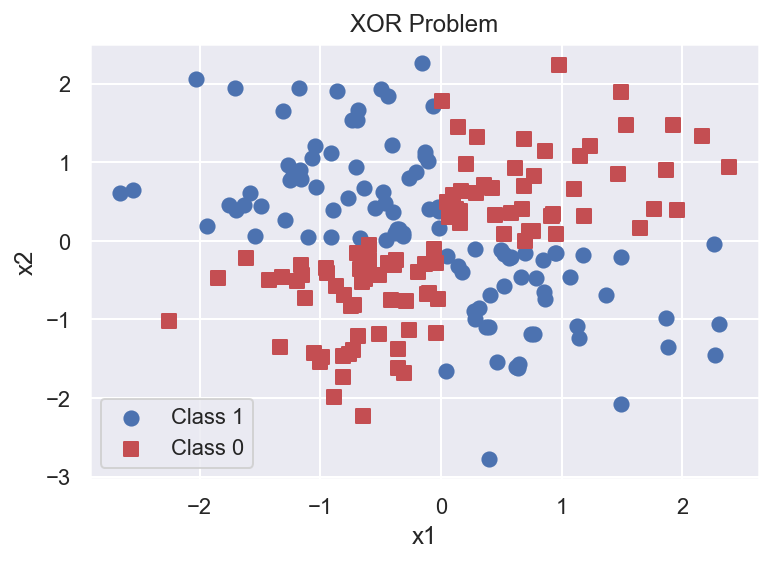

In [56]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c='b', marker='o', label='Class 1', s=50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c='r', marker='s', label='Class 0', s=50)
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR Problem")
plt.show()

선형 SVM을 사용하면 XOR문제를 풀 수 없다.

In [ ]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='클래스 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='클래스 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

from sklearn.svm import SVC

svc = SVC(kernel="linear").fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, svc, "선형 SVC 모형을 사용한 XOR 분류 결과")
plt.show()

## 기저함수를 사용한 비선형 판별 모형

이러한 경우 도움이 되는 것이 원래의 $D$ 차원 독립 변수 벡터 $x$ 대신 기저함수(basis function)으로 변환한 $M$ 차원 벡터 $\phi(x)$를 독립 변수 벡터로 사용하는 방법이다.

$$ \phi(\cdot): {R}^D \rightarrow {R}^M $$

$$ x=(x_1, x_2, \cdots, x_D) \;\;\; \rightarrow \;\;\; \phi(x) = (\phi_1(x), \phi_2(x), \cdots, \phi_M(x)) $$

앞서 XOR 문제를 풀기 위해 다음과 같이 상호 곱(cross-multiplication) 항을 추가한 기저함수를 사용해 보자.


$$ (x_1, x_2) \;\;\; \rightarrow \;\;\; \phi(x) = (x_1^2, \sqrt{2}x_1x_2, x_2^2) $$

In [ ]:
X = np.arange(6).reshape(3, 2)
X

`FunctionTransformer` 전처리 클래스로 위와 기저함수를 이용한 특징 변환을 할 수 있다.

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def basis(X):
    return np.vstack([X[:, 0]**2, np.sqrt(2)*X[:, 0]*X[:, 1], X[:, 1]**2]).T

FunctionTransformer(basis).fit_transform(X)

위와 같은 기저함수를 써서 XOR 문제의 데이터를 변환하면 특성 $\phi_2$를 사용하여 클래스 분류를 할 수 있다는 것을 알 수 있다.

In [ ]:
X_xor2 = FunctionTransformer(basis).fit_transform(X_xor)
plt.scatter(X_xor2[y_xor == 1, 0], X_xor2[y_xor == 1, 1], c="b", marker='o', s=50)
plt.scatter(X_xor2[y_xor == 0, 0], X_xor2[y_xor == 0, 1], c="r", marker='s', s=50)
plt.ylim(-6, 6)
plt.title("변환 공간에서의 데이터 분포")
plt.xlabel(r"$\phi_1$")
plt.ylabel(r"$\phi_2$")
plt.show()

다음 코드는 `Pipeline` 클래스로 기저함수 전치리기와 `SVC` 클래스를 합친 모형의 분류 결과이다.

In [ ]:
from sklearn.pipeline import Pipeline

basismodel = Pipeline([("basis", FunctionTransformer(basis)), 
                       ("svc", SVC(kernel="linear"))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, "기저함수 SVC 모형을 사용한 XOR 분류 결과")
plt.show()

## 커널 트릭

서포트 벡터 머신의 경우 목적 함수와 예측 모형은 다음과 같은 dual form으로 표현할 수 있다.

$$
L =  \sum_{n=1}^N a_n - \dfrac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m y_n y_m x_n^T x_m
$$


$$
y = w^T x - w_0 = \sum_{n=1}^N a_n y_n x_n^T x - w_0
$$

이 수식에서 $x$를 기저함수 변환으로 $\phi(x)$로 바꾸면

$$
L =  \sum_{n=1}^N a_n - \dfrac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m y_n y_m \phi(x_n)^T \phi(x_m)
$$


$$
y = w^T x - w_0 = \sum_{n=1}^N a_n y_n \phi(x_n)^T \phi(x) - w_0
$$

이 된다. 즉 모든 기저함수는 $\phi(x_i)^T\phi(x_j)$의 형태로만 사용되며 독립적으로 사용되지 않는다.

따라서 두 개의 변환된 독립 변수 벡터를 내적(inner product) 한 값 $\phi(x_i)^T\phi(x_j)$를 하나의 함수로 나타낼 수 있다.

$$ k(x_i, x_j) = \phi(x_i)^T \phi(x_j) $$

이러한  함수를 커널(kernel)이라고 한다.

대응하는 기저함수가 존재할 수만 있다면 기저함수를 먼저 정의하고 커널을 정의하는 것이 아니라 커널을 먼저 정의해도 상관없다.  

## 커널의 의미

서포트 벡터 머신의 목적 함수와 예측 모형은 커널을 사용하여 표현하면 다음과 같다.

$$
L =  \sum_{n=1}^N a_n - \dfrac{1}{2}\sum_{n=1}^N\sum_{m=1}^N a_n a_m y_n y_m k(x_n, x_m)
$$


$$
y = w^T x - w_0 = \sum_{n=1}^N a_n y_n k(x_n, x) - w_0
$$

커널을 사용하지 않는 경우 $ k(x, y) = x^Ty $라는 점을 고려하면 커널은 다음과 같은 특징을 보인다.

* $x$와 $y$가 동일한 벡터일 때 가장 크고
* 두 벡터간의 거리가 멀어질 수록 작아진다.

즉, 두 표본 데이터 간의 유사도(similarity)를 측정하는 기준으로 볼 수도 있다. 

## 커널 사용의 장점

커널을 사용하면 베이시스 함수를 하나씩 정의하는 수고를 덜 수 있을뿐더러 변환과 내적에 들어가는 계산량이 줄어든다. 예를 들어, 다음과 같은 기저함수의 경우

$$ \phi(x_i) = \phi([x_{i,1}, x_{i,2}]) = (x_{i,1}^2, \sqrt{2}x_{i,1}x_{i,2}, x_{i,2}^2) $$

커널 방법을 쓰지 않을 경우에 $ \phi(x_i)^T \phi(x_j) $를 계산하려면 $4 + 4 + 3 = 11$ 번의 곱셈을 해야 한다.

* $\phi(x_1)$ 계산 : 곱셈 4회
* $\phi(x_2)$ 계산 : 곱셈 4회
* 내적: 곱셈 3회

그런데 이 기저함수는 다음과 같은 커널로 대체가능하다.

$$ 
\begin{eqnarray}
k(x_1, x_2) 
&=& (x_1^Tx_2)^2 \\
&=& (x_{1,1}x_{2,1} + x_{1,2}x_{2,2})^2 \\
&=& x_{1,1}^2x_{2,1}^2 + 2x_{1,1}x_{2,1}x_{1,2}x_{2,2} + x_{1,2}^2y_{2,2}^2 \\
&=& (x_{1,1}^2, \sqrt{2}x_{1,1}x_{1,2}, x_{1,2}^2)  (x_{2,1}^2, \sqrt{2}x_{2,1}x_{2,2}, x_{2,2}^2)^T \\
&=& \phi(x_1)^T \phi(x_2)
\end{eqnarray}
$$


커널을 사용하면  $ \phi(x_1)^T \phi(x_2) $ 을 계산하는데 $2 + 1 = 3$ 번의 곱셈이면 된다.
 
* $x_1^Tx_2$: 곱셈 2회
* 제곱: 곱셈 1회

## 커널의 확장 생성

어떤 함수가 커널함수가 된다는 것을 증명하기 위해서는 기저함수를 하나 하나 정의할 필요없이 기저함수의 내적으로 표현할 수 있다는 것만 증명하면 된다. 하지만 실제로는 다음 규칙을 이용하면 이미 만들어진 커널 $k_1(x_1, x_2)$, $k_2(x_1, x_2)$로부터 새로운 커널을 쉽게 만들 수 있다.

1. 커널함수를 양수배한 함수는 커널함수이다.
$$k(x_1, x_2) = ck_1(x_1, x_2)\;\;(c > 0)$$ <br>
1. 커널함수에 양수인 상수를 더한 함수는 커널함수이다.
$$k(x_1, x_2) = k_1(x_1, x_2) + c\;\;(c > 0)$$ <br>
1. 두 커널함수를 더한 함수는 커널함수이다.
$$k(x_1, x_2) = k_1(x_1, x_2) + k_2(x_1, x_2)$$ <br>
1. 두 커널함수를 곱한 함수는 커널함수이다.
$$k(x_1, x_2) = k_1(x_1, x_2)k_2(x_1, x_2)$$ <br>
1. 커널함수를 $x\geq0$에서 단조증가(monotonically increasing)하는 함수에 적용하면 커널함수이다.
$$k(x_1, x_2) = (k_1(x_1, x_2))^n \;\; (n=1, 2, \cdots)$$
$$k(x_1, x_2) = \exp(k_1(x_1, x_2))$$
$$k(x_1, x_2) = \text{sigmoid}(k_1(x_1, x_2))$$
1. $x_1, x_2$ 각각의 커널함수값의 곱도 커널함수이다.
$$k(x_1, x_2) = k_1(x_1, x_1)k_2(x_2, x_2) $$


## 많이 사용되는 커널

다음과 같은 커널들이 많이 사용되는 커널들이다. 이 커널들은 대부분 기저함수로 변환하였을 때 무한대의 차원을 가지는 기저함수가 된다. 따라서 대부분의 비선형성을 처리할 수 있다. 비교를 위해 선형 서포트 벡터 머신의 경우도 추가하였다.


* 선형 서포트 벡터 머신

$$ k(x_1, x_2) = x_1^Tx_2 $$


* 다항 커널 (Polynomial Kernel)

$$ k(x_1, x_2) = (\gamma (x_1^Tx_2) + \theta)^d $$


* RBF(Radial Basis Function) 또는 가우시안 커널(Gaussian Kernel)

$$ k(x_1, x_2) = \exp \left( -\gamma ||x_1-x_2||^2 \right) $$


* 시그모이드 커널 (Sigmoid Kernel)

$$ k(x_1, x_2) = \tanh(\gamma (x_1^Tx_2) + \theta) $$


앞에서 사용한 기저함수는 $\gamma = 1, \theta= 0, d=2$ 인 다항 커널임을 알 수 있다.

## 다항 커널

다항 커널은 벡터의 내적으로 정의된 커널을 확장하여 만든 커널이다. 다항 커널이 어떤 기저함수로 되어 있는지 알아보자.

간단한 경우로 $\gamma=1$, $\theta=1$, $d=3$이고 $x$가 스칼라인 경우에는

$$ 
\begin{eqnarray}
k(x_1, x_2) 
&=& (x_1^Tx_2 + 1)^4 \\
&=& x_1^4x_2^4 + 4x_1^3x_2^3 + 6x_1^2x_2^2 + 4x_1x_2 + 1 \\
&=& (x_1^4, 2x_1^3, \sqrt{6}x_1, 2x_1, 1)^T (x_2^4, 2x_2^3, \sqrt{6}x_2, 2x_2, 1) \ \\
\end{eqnarray}
$$

처럼 기저함수의 내적이 된다. 즉, 기저함수는 다음 5개가 된다.

$$
\begin{eqnarray}
\phi_1(x) &=& x^4 \\
\phi_2(x) &=& 2x^3 \\
\phi_3(x) &=& \sqrt{6}x^2 \\
\phi_4(x) &=& 2x \\
\phi_5(x) &=& 1 \\
\end{eqnarray}
$$

In [ ]:
x1 = 1
x2 = np.linspace(-3, 3, 100)

def poly4(x1, x2):
    return (x1 * x2 + 1) ** 4

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(x2, poly4(x1, x2), ls="-")
plt.xlabel("x2")
plt.title("4차 다항커널의 예")

plt.subplot(122)
plt.plot(x2, x2 ** 4)
plt.plot(x2, 2 * x2 ** 3)
plt.plot(x2, np.sqrt(6) * x2 ** 2)
plt.plot(x2, 2 * x2)
plt.plot(x2, np.ones_like(x2))
plt.xlabel("x2")
plt.title("4차 다항커널의 기저함수들")

plt.show()

## RBF 커널

RBF 커널은 가우시안 커널이라고도 한다. 문제를 간단하게 하기 위해 다음과 같이 가정한다.

$$
\gamma=\frac{1}{2}
$$

$$
\|x_1\| = \|x_2\| = 1
$$

그러면 RBF 커널은

$$ 
\begin{eqnarray}
k(x_1, x_2) 
&=& \exp{\left(-\frac{||x_1 - x_2||^2}{2}\right)} \\
&=& \exp{\left(-\frac{x_1^Tx_1}{2} - \frac{x_2^Tx_2}{2} + 2x_1^Tx_2 \right)} \\
&=& \exp{\left(-\frac{x_1^Tx_1}{2}\right)}\exp{\left(-\frac{x_2^Tx_2}{2}\right)}\exp{(x_1^Tx_2)} \\
&=& C \exp{(x_1^Tx_2)} \\
&\approx& C \left( 1 + (x_1^Tx_2) + \dfrac{1}{2!}(x_1^Tx_2)^2 +  \dfrac{1}{3!}(x_1^Tx_2)^3 + \cdots \right) \\
\end{eqnarray}
$$

에서 차수가 무한대인 다항커널과 같다. 

/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52964 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 45328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/sanghyuk/anaconda/

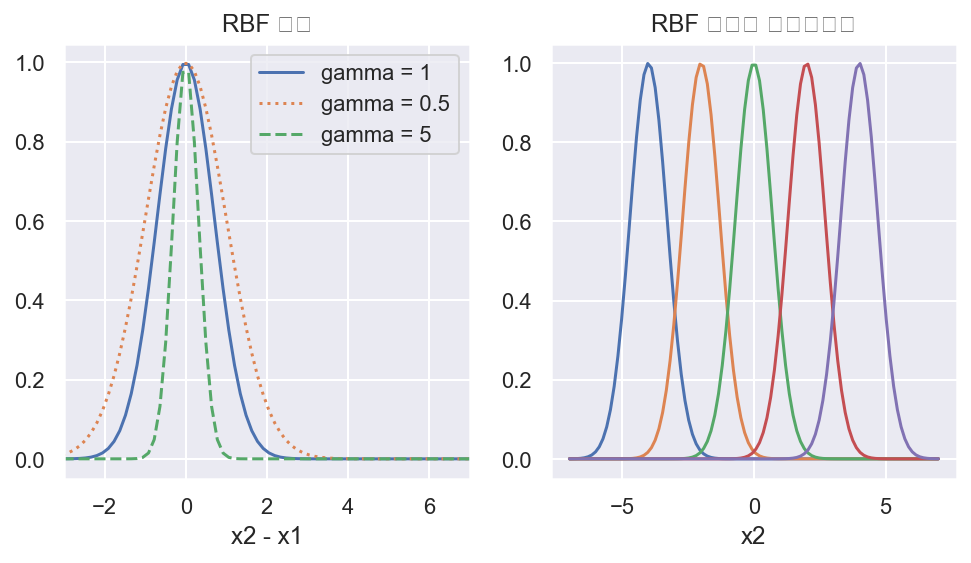

In [16]:
x1 = 0.0
x2 = np.linspace(-7, 7, 100)

def rbf(x1, x2, gamma):
    return np.exp(-gamma * np.abs(x2 - x1) ** 2)

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(x2, rbf(x1, x2, 1), ls="-", label="gamma = 1")
plt.plot(x2, rbf(x1, x2, 0.5), ls=":", label="gamma = 0.5")
plt.plot(x2, rbf(x1, x2, 5), ls="--", label="gamma = 5")
plt.xlabel("x2 - x1")
plt.xlim(-3, 7)
plt.legend(loc=1)
plt.title("RBF 커널")

plt.subplot(122)
plt.plot(x2, rbf(-4, x2, 1))
plt.plot(x2, rbf(-2, x2, 1))
plt.plot(x2, rbf(0, x2, 1))
plt.plot(x2, rbf(2, x2, 1))
plt.plot(x2, rbf(4, x2, 1))
plt.xlabel("x2")
plt.title("RBF 커널의 기저함수들")

plt.show()

## scikit-learn의 커널 SVM

scikit-learn의 `SVM` 클래스는 `kernel` 인수를 지정하여 커널을 설정할 수 있다.

* `kernel = "linear"`: 선형 SVM. $k(x_1, x_2) = x_1^T x_2$ 
* `kernel = "poly"`: 다항 커널. $k(x_1, x_2) = (\gamma (x_1^Tx_2) + \theta)^d$ 
    * `gamma`: $\gamma$
    * `coef0`: $\theta$
    * `degree`: $d$
* `kernel = "rbf"` 또는 `kernel = None`: RBF 커널. $k(x_1, x_2) = \exp \left( -\gamma ||x_1-x_2||^2 \right)$
    * `gamma`: $\gamma$
* `kernel = "sigmoid"`: 시그모이드 커널. $k(x_1, x_2) = \tanh(\gamma (x_1^Tx_2) + \theta)$
    * `gamma`: $\gamma$
    * `coef0`: $\theta$


In [ ]:
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X_xor, y_xor)
rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor)
sigmoidsvc = SVC(kernel="sigmoid", gamma=2, coef0=2).fit(X_xor, y_xor)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_xor(X_xor, y_xor, polysvc, "다항커널 SVC를 사용한 분류 결과")
plt.subplot(312)
plot_xor(X_xor, y_xor, rbfsvc, "RBF커널 SVC를 사용한 분류 결과")
plt.subplot(313)
plot_xor(X_xor, y_xor, sigmoidsvc, "시그모이드커널 SVC를 사용한 분류 결과")
plt.tight_layout()
plt.show()

## 커널 파라미터의 영향

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=2).fit(X_xor, y_xor), "RBF SVM (gamma=2)")
plt.subplot(222)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=10).fit(X_xor, y_xor), "RBF SVM (gamma=10)")
plt.subplot(223)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=50).fit(X_xor, y_xor), "RBF SVM (gamma=50)")
plt.subplot(224)
plot_xor(X_xor, y_xor, SVC(kernel="rbf", gamma=100).fit(X_xor, y_xor), "RBF SVM (gamma=100)")
plt.tight_layout()
plt.show()

## 붓꽃 문제에의 응용

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='^', label='0', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='o', label='1', s=100)
    plt.scatter(X[y == 2, 0], X[y == 2, 1], c='b', marker='s', label='2', s=100)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("꽃잎의 길이")
    plt.ylabel("꽃잎의 폭")
    plt.title(title)


model1 = SVC(kernel='linear').fit(X_test_std, y_test)
model2 = SVC(kernel='poly', random_state=0,
             gamma=10, C=1.0).fit(X_test_std, y_test)
model3 = SVC(kernel='rbf', random_state=0, gamma=1,
             C=1.0).fit(X_test_std, y_test)

plt.figure(figsize=(8, 12))
plt.subplot(311)
plot_iris(X_test_std, y_test, model1, "선형 SVC")
plt.subplot(312)
plot_iris(X_test_std, y_test, model2, "다항커널 SVC")
plt.subplot(313)
plot_iris(X_test_std, y_test, model3, "RBF커널 SVM")
plt.tight_layout()
plt.show()